# Visualizações

Aqui são feitas visualizações mais aprofundadas dos dados pré-processados

In [1]:
from python_scripts.save_load import load_df_from_bucket
from python_scripts.plots import plot_word_counts, plot_cloud
from python_scripts.processing import evaluate_words_lemmas
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = load_df_from_bucket('dados_processados.csv', processado=True)

# Corrigir words e lemmas de volta para listas em vez de strings
df[['words', 'lemmas']] = df.apply(evaluate_words_lemmas, axis=1, result_type='expand')

df.head()

,fake,text,words,lemmas,avg_sent_len,avg_word_len
0,0,A divisão do STF ao meio entre partidários e ...,"[divisão, STF, meio, partidários, independente...","[divisão, STF, meio, partidário, independente,...",10.747664,6.690641
1,1,"General manda recado para STF: ""Abaixaram as c...","[General, manda, recado, STF, Abaixaram, calça...","[general, mandar, recado, STF, abaixar, calça,...",11.000000,6.461584
2,1,O Nordeste acordou! Lula e o PT são enxotados:...,"[Nordeste, acordou, Lula, PT, enxotados, Chega...","[nordeste, acordar, Lula, PT, enxotar, chegar,...",7.333333,6.565873
3,0,"Dois relatórios da Polícia Federal, com análi...","[Dois, relatórios, Polícia, Federal, análises,...","[dois, relatório, Polícia, Federal, análise, m...",17.000000,7.237319
4,1,Coreia do Norte declara status de QUASE-GUERRA...,"[Coreia, Norte, declara, status, QUASE-GUERRA,...","[Coreia, Norte, declarar, status, QUASE-GUERRA...",11.666667,6.513799


## Nuvens de palavras
Já foram mostradas no notebook de pré-processamento (preprocessing.ipynb), repetidas aqui para facilidade de verificação junto às demais visualizações

#### Palavras

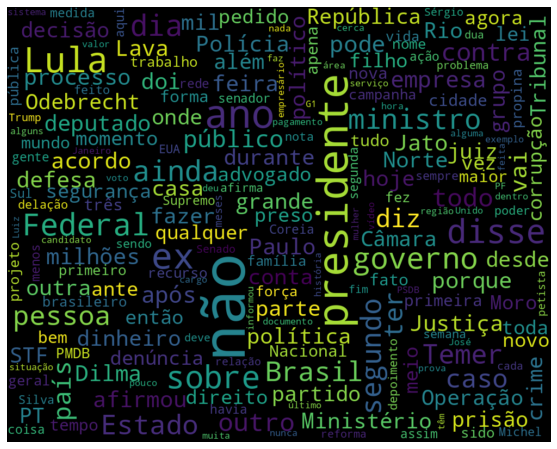

In [6]:
plot_cloud(' '.join([x for x in df['words_str']]))

#### Lemmas

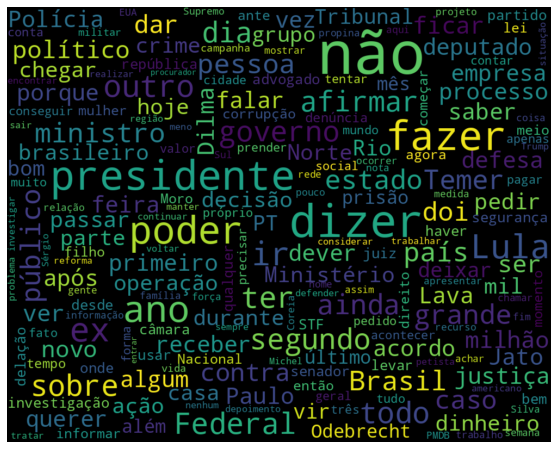

In [7]:
plot_cloud(' '.join([x for x in df['lemmas_str']]))

## Contagem de palavras

#### Palavras

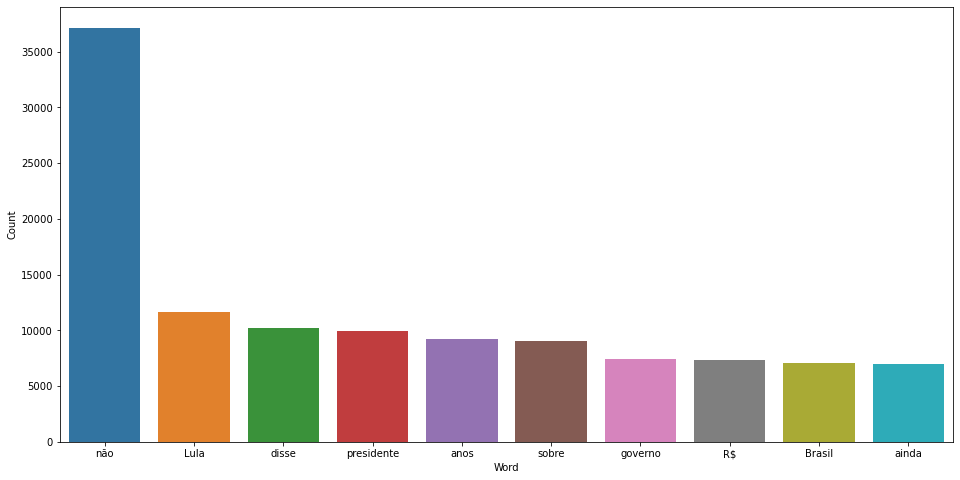

In [13]:
token_list = list(list([a for b in df.words.tolist() for a in b]))
plot_word_counts(token_list, n=10)

#### Lemmas

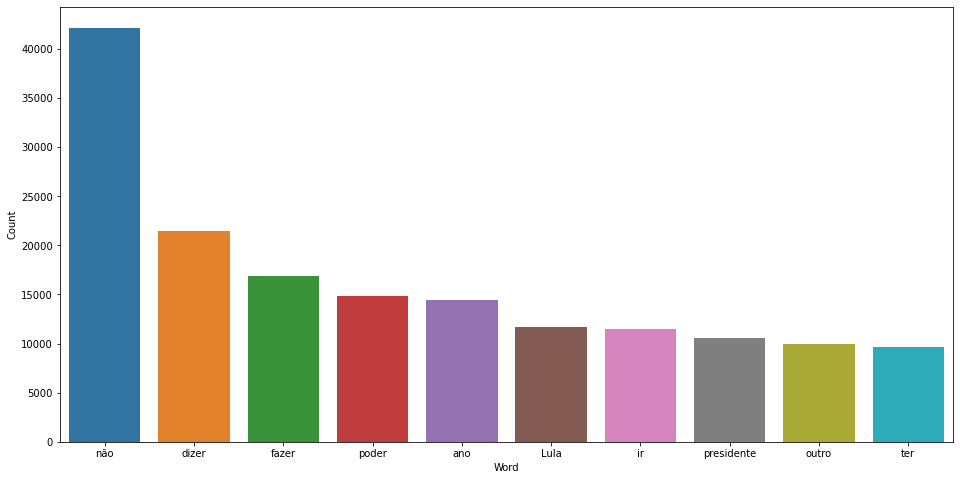

In [14]:
token_list = list(list([a for b in df.lemmas.tolist() for a in b]))
plot_word_counts(token_list, n=10)

# Tamanhos médios de senteças e palavras

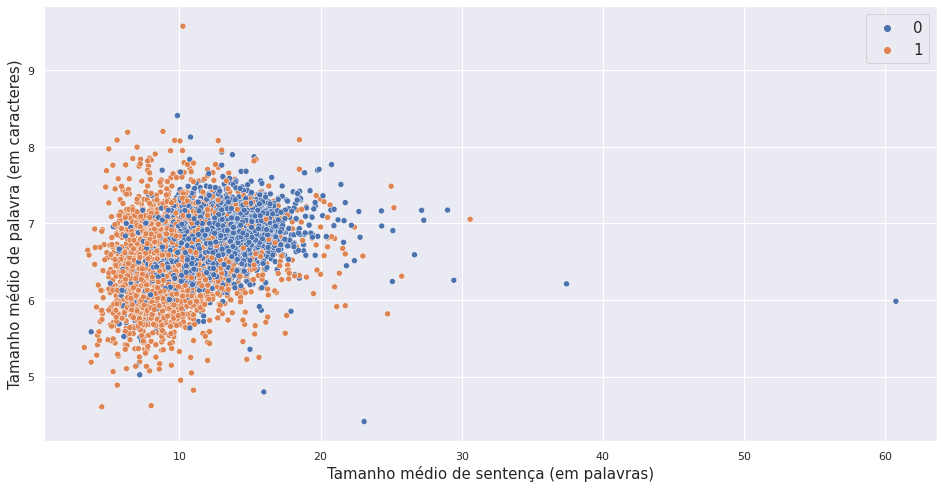

In [43]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x=df['avg_sent_len'], y=df['avg_word_len'], hue=df['fake'])
ax.legend(fontsize=15)
ax.set_ylabel("Tamanho médio de palavra (em caracteres)", fontsize=15)
ax.set_xlabel("Tamanho médio de sentença (em palavras)", fontsize=15)
plt.show()

#### Zoom para visualizar melhor sem outliers

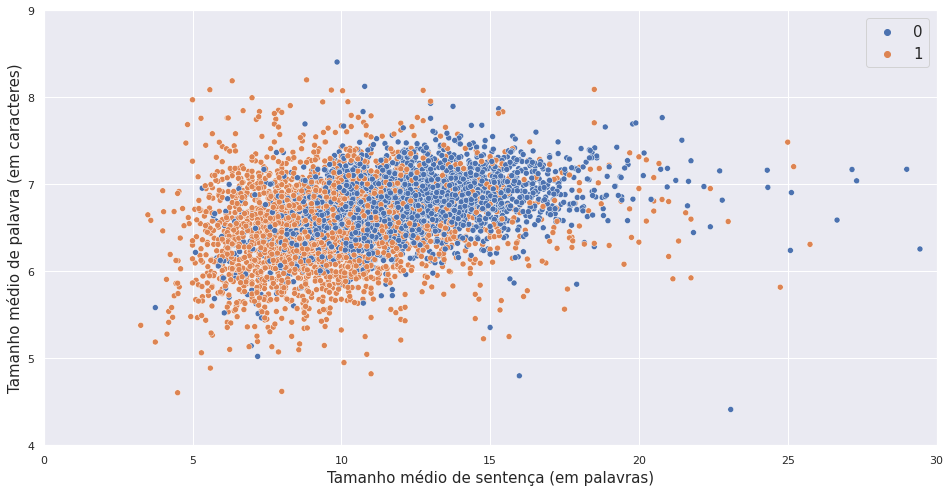

In [45]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x=df['avg_sent_len'], y=df['avg_word_len'], hue=df['fake'])
ax.set(xlim=(0, 30))
ax.set(ylim=(4,9))
ax.legend(fontsize=15)
ax.set_ylabel("Tamanho médio de palavra (em caracteres)", fontsize=15)
ax.set_xlabel("Tamanho médio de sentença (em palavras)", fontsize=15)

plt.show()